## Hand-Written Digit Recognition Using ANN

*__using matplotlib to import images for now__*

In [27]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

### __a.__ Check out the dataset. It includes 1797 small images (8x8 pixels), each one includes a hand-written digit (0-9). The corresponding csv file "label.csv" includes the labels of the images.

The goal is to build an Artificial Neural Network that can recognize the hand-written digits.

*Import the following two libraries to work with images:*

__`import matplotlib.image as mpimg`__

__`import matplotlib.pyplot as plt`__

*You can use:*

__`mpimg.imread(file_name)`__

*to load an image, and*

__`plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')`__

*to show an image.*

Add __`%matplotlib inline`__ at top of your code to make sure that the images will be shown inside the Jupyter explorer page.

*imports*

In [28]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

*read in data*

In [29]:
digits_map = pd.read_csv("label.csv")
digits_map.head()

,name of the file,digit
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


*display an image*

(8, 8)
[[  0   2  88 217 158  21   0   0]
 [ 16   0 228 236 166 253  95   0]
 [  0  41 255  44  11 182 132   3]
 [ 11  80 220   0   2 143 133   5]
 [  6  71 122   0   5 155 140   0]
 [  0  76 194   0  26 207 105  15]
 [  0  18 255  83 146 211   4   0]
 [  4   3  87 228 182   0   9   2]]


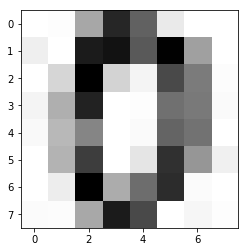

In [30]:
image = mpimg.imread("Digit/0.jpg")
print(image.shape)
print(image)
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

### __b.__ Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into a row of the feature matrix with 64 feature columns for 64 pixels.

*helper method*

In [32]:
# reads a directory of images, flattens the features to a single row then returns as a dataframe
def extract_features(file_path, features):
    new_df = []
    for feature in range(len(features)):
        x = mpimg.imread(file_path + str(feature) + ".jpg")
        image_flat = x.flatten()
        new_df.append(image_flat )
    return pd.DataFrame(new_df)

*import images and extract features*

In [33]:
file_path = "Digit/"

digit_file_names = digits_map["name of the file"]

X = extract_features(file_path, digit_file_names) # helper method

*build label vector*

In [34]:
y = digits_map["digit"]

*view data*

In [35]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4


*shape*

In [36]:
X.shape

(1797, 64)

### __c.__ Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.

*split dataset*

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

*display shapes*

In [38]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1617, 64)
X_test shape: (180, 64)
y_train shape: (1617,)
y_test shape: (180,)


### __d.__ *Design* and *Train* an ANN with one hidden layer with 80 neurons to recognize the digits based on the training dataset that you built in part (c).

Use

`random_state = 1`,

`learning_rate_init = 0.002`.

Then, __*Test*__ your ANN on testing set (from part(*__c__*) ), and *calculate and report* the __*accuracy*__. Also, *calculate and report* the __*Confusion Matrix*__.

*design*

In [39]:
digit_ann = MLPClassifier(
    hidden_layer_sizes=(80,),
    activation="logistic",
    solver="adam",
    alpha=1e-5,
    random_state=1,
    learning_rate_init=0.002
)

*train*

In [40]:
digit_ann.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

*test*

In [41]:
y_predict_digit_ann = digit_ann.predict(X_test)
print("Digit ANN prediction:", y_predict_digit_ann)

Digit ANN prediction: [4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 4 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 8 7 8 7 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 1 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 8 3 1 1 9 5 4 1 7 4 8 9 5 7 6 9 4 0 4 0 0 9]


*accuracy*

In [42]:
score_digit_ann = accuracy_score(y_test, y_predict_digit_ann)
print("Digit ANN Accuracy:", score_digit_ann)

Digit ANN Accuracy: 0.9166666666666666


*confusion matrix*

In [43]:
cm_digit_ann = metrics.confusion_matrix(y_test, y_predict_digit_ann)
print("\nConfusion Matrix\n\n", cm_digit_ann)


Confusion Matrix

 [[13  0  0  0  1  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  1  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  1  0  0]
 [ 0  0  0  0 16  0  0  1  3  1]
 [ 0  0  0  0  0 16  0  0  0  0]
 [ 0  1  0  0  1  0 16  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0]
 [ 0  2  0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  1  0  0  1 14]]


### __e.__ Now, use `GridSearchCV` to find the best number of neurons for your 1-hidden layer network.

Search in the range of 50 - 200 neurons, and use the following parameters for your NN:

`activation='logistic', solver='adam', alpha=1e-5, random_state=1, learning_rate_init = 0.002`.

What is the best accuracy, and best number of neurons?

__Note:__ Since the size of the dataset is not small, *__it may take a long time to finish the process__* (depending on your system it can be up to hours). So, don’t leave it for the last minutes (late submissions will not be accepted under any circumstances!)

*imports*

In [44]:
from sklearn.model_selection import GridSearchCV

*define range of neurons*

In [45]:
neuron_number = [(i,) for i in range(50, 201) ]

param_grid = dict(hidden_layer_sizes = neuron_number)

print(param_grid)

{'hidden_layer_sizes': [(50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,), (61,), (62,), (63,), (64,), (65,), (66,), (67,), (68,), (69,), (70,), (71,), (72,), (73,), (74,), (75,), (76,), (77,), (78,), (79,), (80,), (81,), (82,), (83,), (84,), (85,), (86,), (87,), (88,), (89,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), (99,), (100,), (101,), (102,), (103,), (104,), (105,), (106,), (107,), (108,), (109,), (110,), (111,), (112,), (113,), (114,), (115,), (116,), (117,), (118,), (119,), (120,), (121,), (122,), (123,), (124,), (125,), (126,), (127,), (128,), (129,), (130,), (131,), (132,), (133,), (134,), (135,), (136,), (137,), (138,), (139,), (140,), (141,), (142,), (143,), (144,), (145,), (146,), (147,), (148,), (149,), (150,), (151,), (152,), (153,), (154,), (155,), (156,), (157,), (158,), (159,), (160,), (161,), (162,), (163,), (164,), (165,), (166,), (167,), (168,), (169,), (170,), (171,), (172,), (173,), (174,), (175,), (176,), (177,), (1

*create classifier*

In [25]:
new_ANN = MLPClassifier(
    activation="logistic",
    solver="adam",
    alpha=1e-5,
    random_state=1,
    learning_rate_init=0.002
)

*create GridSearchCV*

In [ ]:
grid = GridSearchCV(
    new_ANN,
    param_grid,
    cv=10,
    scoring="accuracy",
    n_jobs=4
)

*find best accuracy*

In [ ]:
grid.fit(X, y)

*report best accuracy*

In [29]:
print("Score:", grid.best_score_)

Score: 0.9593767390094602


*report best number of neurons*

In [30]:
print("\nBest accuracy:", grid.best_params_)


Best accuracy: {'hidden_layer_sizes': (165,)}
